In [1]:
import numpy as np
import pandas as pd

import os
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas_datareader as web
import datetime as dt

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, mean_squared_error
from sklearn.model_selection import train_test_split, TimeSeriesSplit

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

In [2]:
NVIDIA_data = pd.read_csv("Stock Prediction Datasets/NVDA.csv", index_col="Date")

In [3]:
NVIDIA_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-20,44.220001,44.757500,43.250000,43.599998,43.303883,71914800
2019-03-21,43.832500,46.250000,43.782501,45.985001,45.672691,82431200
2019-03-22,45.709999,46.200001,44.235001,44.375000,44.073631,74764400
2019-03-25,43.965000,44.612499,42.777500,43.445000,43.149948,52521200
2019-03-26,44.872501,45.437500,43.650002,44.217499,43.917191,70350800


In [4]:
NVIDIA_data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1205.000000,1205.000000,1205.000000,1205.000000,1205.000000,1.205000e+03
mean,183.490238,186.878379,180.000641,183.599039,183.368360,4.535506e+07
std,123.912388,125.844494,121.707698,123.829698,123.870345,1.865566e+07
min,33.977501,34.367500,33.150002,33.445000,33.255768,9.788400e+06
25%,88.000000,89.432503,86.894997,88.050003,87.760605,3.214710e+07
50%,151.850006,154.384995,149.250000,152.507507,152.157455,4.242700e+07
75%,236.000000,242.169998,232.059998,236.419998,236.083298,5.505640e+07
max,502.160004,505.480011,494.119995,504.089996,504.022034,1.543911e+08


In [67]:
# Plotting

def plot_time_series_specific(data: pd.DataFrame, x_column: str, y_column: str, 
                              x_label: str = 'Time Scale', y_label: str = 'Scaled USD', 
                              figsize: tuple = (15, 10), interval: int = 60):
    """
    Plots specific columns of a DataFrame against each other over time.

    Parameters:
        data (pd.DataFrame): The DataFrame containing the time series data.
        x_column (str): The name of the column to use as the x-axis data.
        y_column (str): The name of the column to use as the y-axis data.
        x_label (str, optional): Label for the x-axis. Defaults to 'Time Scale'.
        y_label (str, optional): Label for the y-axis. Defaults to 'Scaled USD'.
        figsize (tuple, optional): Figure size in inches (width, height). Defaults to (15, 10).
        interval (int, optional): Interval for major tick marks on the x-axis in days. Defaults to 60.
    """
    # Create a new figure with specified size
    plt.figure(figsize=figsize)
    
    # Set the date format and locator for the x-axis
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=interval))
    
    # Convert index values to datetime objects
    x_dates = [dt.datetime.strptime(d, '%Y-%m-%d').date() for d in data.index.values]

    # Plot the specified columns
    plt.plot(x_dates, data[x_column], label=x_column)
    plt.plot(x_dates, data[y_column], label=y_column)

    # Set labels for axes and legend
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.legend()
    
    # Rotate x-axis labels for better readability
    plt.gcf().autofmt_xdate()
    
    # Show the plot
    plt.show()

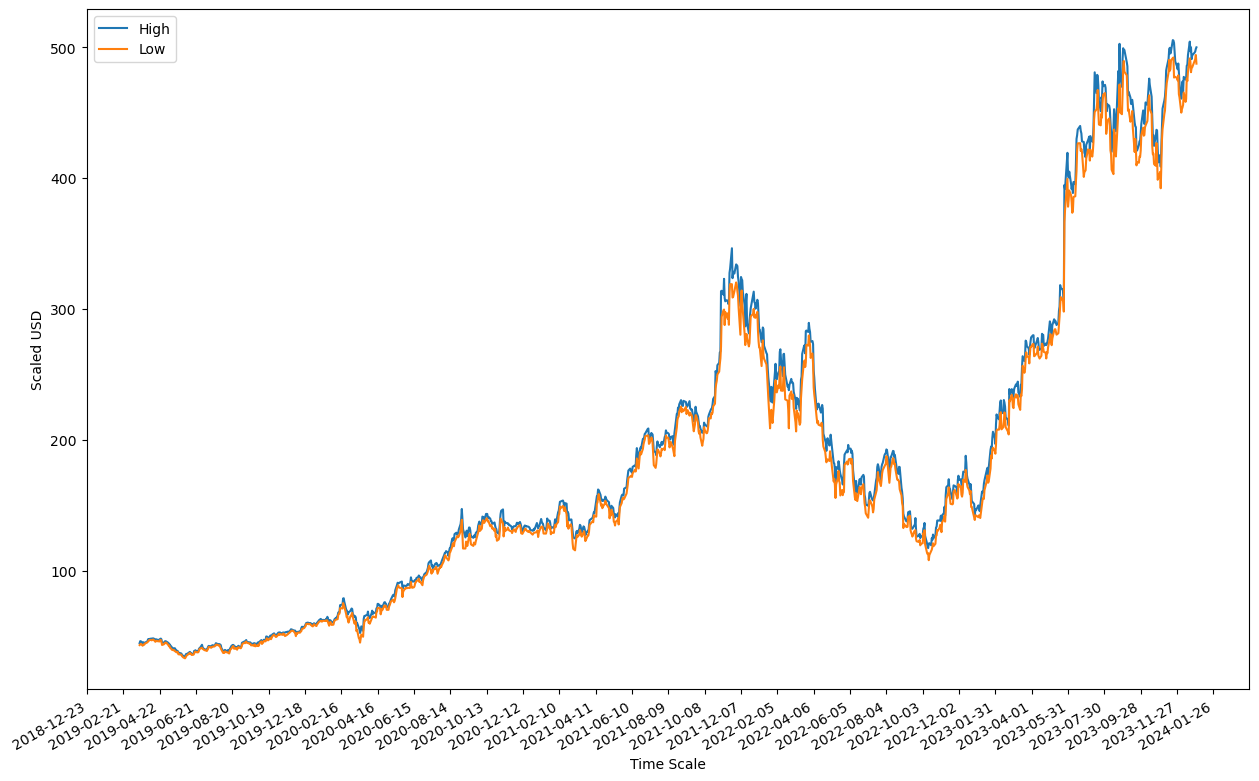

In [68]:
# Plotting High against Low
plot_time_series(NVIDIA_data, 'High', 'Low')

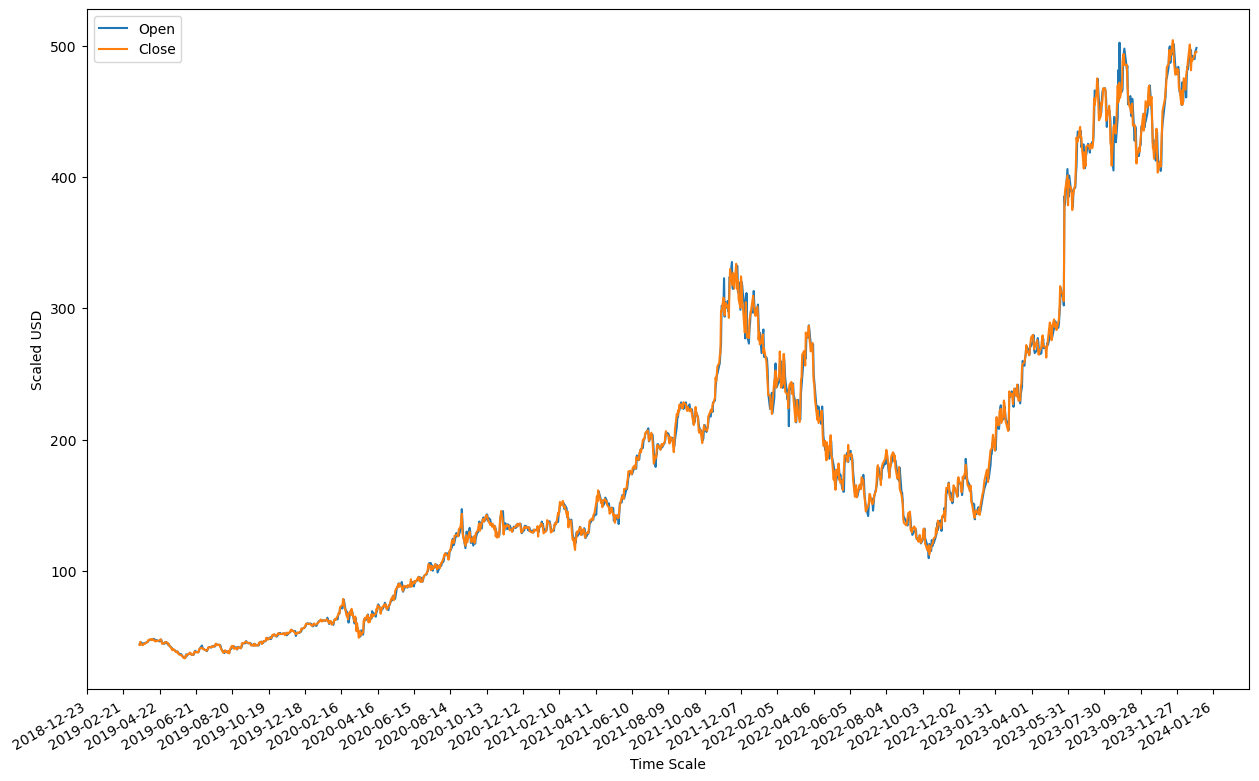

In [70]:
# Open and Close
plot_time_series(NVIDIA_data, 'Open', 'Close')

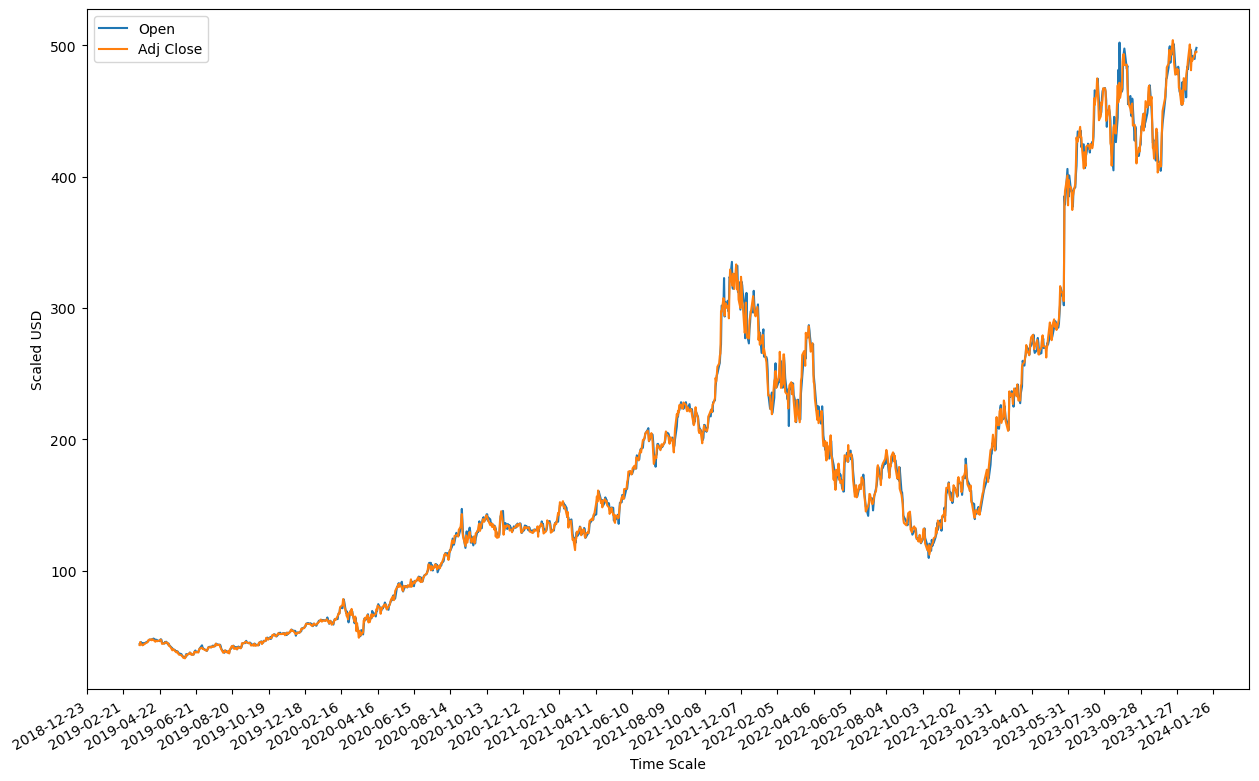

In [71]:
# close and adj close

plot_time_series(NVIDIA_data, 'Open', 'Adj Close')

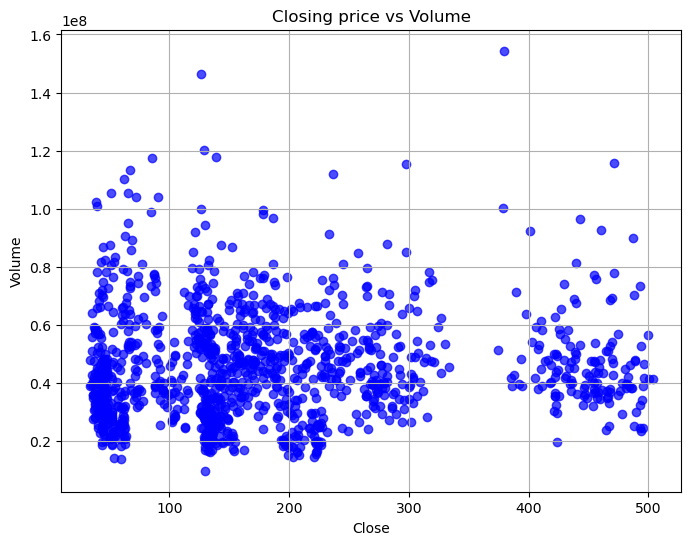

In [8]:
# Closing price vs Volume Scatter plot

plt.figure(figsize=(8,6))
plt.scatter(NVIDIA_data['Close'], NVIDIA_data['Volume'], color='blue', alpha=0.7)
plt.xlabel('Close')
plt.ylabel('Volume')
plt.title('Closing price vs Volume')
plt.grid(True)
plt.show()

In [ ]:
def selection_and_scaling(data)

In [9]:
features = ['Open', 'High', 'Low', 'Volume', 'Adj Close']

y = NVIDIA_data['Close']
X = pd.DataFrame(NVIDIA_data[features]) # to access the columns values, X had be to transform from a numpy array to df

In [72]:
# # Using StandardScaler to rescale values between -1 and 1

def extract_and_scale(data: pd.DataFrame, features: list, target_column: str, scaler=None, num_rows: int = 5):
    """
    Scales specified features in the DataFrame using StandardScaler and prints the first few rows of the scaled DataFrame.

    Parameters:
        data (pd.DataFrame): The DataFrame containing the data to be scaled.
        features (list): A list of column names to be scaled.
        target_column (str): The name of the target column.
        scaler: An instance of a scaler (e.g., StandardScaler). If None, a new scaler will be initialized. Defaults to None.
        num_rows (int, optional): Number of rows to print from the scaled DataFrame. Defaults to 5.

    Returns:
        pd.DataFrame: The scaled DataFrame.
    """
    # Extract features and target column
    X = pd.DataFrame(data[features])
    y = data[target_column]

    # Initialize the scaler if not provided
    if scaler is None:
        scaler = StandardScaler()

    # Fit the scaler to the data and transform it
    X_scaled = scaler.fit_transform(X.values)

    # Create a new DataFrame with the scaled values and the original column names and index
    X_scaled_df = pd.DataFrame(columns=X.columns, data=X_scaled, index=X.index)

    # Print the first few rows of the scaled DataFrame
    print(X_scaled_df.head(num_rows))

    return X_scaled_df

In [74]:
scaled_df = extract_and_scale(NVIDIA_data, features=['Open', 'High', 'Low', 'Volume', 'Adj Close'], target_column='Close')

                Open      High       Low    Volume  Adj Close
Date                                                         
2019-03-20 -1.124408 -1.129806 -1.124065  1.424273  -1.131204
2019-03-21 -1.127536 -1.117941 -1.119688  1.988218  -1.112073
2019-03-22 -1.112378 -1.118339 -1.115969  1.577084  -1.124987
2019-03-25 -1.126467 -1.130959 -1.127949  0.384286  -1.132447
2019-03-26 -1.119140 -1.124400 -1.120778  1.340403  -1.126251


In [94]:
def lstm_split(scaled_df, y, n_steps, train_split=0.8):
    """
    Split dataset into input-output pairs suitable for training an LSTM model.

    Args:
        X: Input features (numpy array or pandas DataFrame).
        y: Target variable (numpy array or pandas Series).
        n_steps: Number of time steps for each input sequence.
        train_split: Percentage of data to be used for training (default: 0.8).

    Returns:
        numpy arrays of X_train, X_test, y_train, and y_test.
    """
    X_seq, y_seq = [], []  # Initialize empty lists to store input-output pairs
    for i in range(len(scaled_df) - n_steps + 1):
        # Append input sequence (from current index to n_steps ahead) to X_seq
        X_seq.append(scaled_df[i:i + n_steps])
        # Append output value (n_steps ahead) to y_seq
        y_seq.append(y[i + n_steps - 1])

    # Convert lists to numpy arrays
    X_seq = np.array(X_seq)
    y_seq = np.array(y_seq)

    # Calculate split index
    split_idx = int(len(X_seq) * train_split)

    # Split the data into training and testing sets
    X_train, X_test = X_seq[:split_idx], X_seq[split_idx:]
    y_train, y_test = y_seq[:split_idx], y_seq[split_idx:]

    return X_train, X_test, y_train, y_test

In [96]:
# Call lstm_split function with preprocessed X and y
X_train_seq, X_test_seq, y_train_seq, y_test_seq = lstm_split(scaled_df.values, y.values, n_steps=2)

print(X_train_seq.shape, X_test_seq.shape, y_train_seq.shape, y_test_seq.shape)

(963, 2, 5) (241, 2, 5) (963,) (241,)


In [40]:
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner import HyperModel
from keras_tuner.tuners import RandomSearch

# Define the base LSTM model with hyperparameters
class MyHyperModel(HyperModel):
    def __init__(self, input_shape):
        self.input_shape = input_shape

    def build(self, hp):
        """
        Build an LSTM model with hyperparameters.

        Args:
            hp (HyperParameters): HyperParameters object to sample hyperparameters from.

        Returns:
            keras.Model: Compiled LSTM model.
        """
        num_units_layer1 = hp.Int('num_units_layer1', min_value=32, max_value=128, step=32)
        num_units_layer2 = hp.Int('num_units_layer2', min_value=16, max_value=64, step=16)
        activation = hp.Choice('activation', ['relu', 'leaky_relu', 'sigmoid'])
        dropout_rate = hp.Float('dropout_rate', min_value=0.1, max_value=0.3, step=0.1)

        model = keras.Sequential()
        model.add(layers.LSTM(num_units_layer1, input_shape=self.input_shape,
                              activation=activation, return_sequences=True, dropout=dropout_rate))
        model.add(layers.LSTM(num_units_layer2, activation=activation))
        model.add(layers.Dense(1))
        model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae'])
        return model

In [41]:
# Split the existing training data into new training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_seq, y_train_seq, test_size=0.3, random_state=42)

# Verify the shapes of the new sets
print("New training set shapes:", X_train.shape, y_train.shape)
print("New validation set shapes:", X_val.shape, y_val.shape)

New training set shapes: (674, 2, 5) (674,)
New validation set shapes: (289, 2, 5) (289,)


In [44]:
# Create an instance of your custom hypermodel
my_hypermodel = MyHyperModel(input_shape=(X_train_seq.shape[1], X_train_seq.shape[2]))

# Create the RandomSearch tuner
tuner = RandomSearch(
    hypermodel=my_hypermodel,
    objective='val_loss',
    max_trials=16,  # Adjust the number of trials as needed
    directory='model_trial_results',
    project_name='CodeAlpha_Stock_prediction_with_lstm'
)

# Train the model with hyperparameter tuning
tuner.search(X_train_seq, y_train_seq, epochs=10, validation_data=(X_val, y_val))

# Get the best model based on validation loss
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the best model on unseen test data
loss, mae = best_model.evaluate(X_test_seq, y_test_seq)
print(f"Test Loss: {loss:.4f}, Test MAE: {mae:.4f}")

Reloading Tuner from model_trial_results\CodeAlpha_Stock_prediction_with_lstm\tuner0.json
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 3264.0771 - mae: 37.5997
Test Loss: 6443.3276, Test MAE: 60.8644


In [55]:
# Define your LSTM model and compile it

early_stopping = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)  # Monitor loss for 5 epochs

# Define the best hyperparameters
best_num_units_layer1 = 128
best_num_units_layer2 = 64
best_activation = 'relu'
best_dropout_rate = 0.1
epochs=100

# Define the model architecture with the best hyperparameters
best_model = keras.Sequential([
    layers.LSTM(best_num_units_layer1, input_shape=input_shape, activation=best_activation, return_sequences=True, dropout=best_dropout_rate),
    layers.LSTM(best_num_units_layer2, activation=best_activation),
    layers.Dense(1)
])

# Compile the model
best_model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model on your training data
history = best_model.fit(X_train_seq, y_train_seq, epochs=epochs, validation_data=(X_val, y_val))

# Evaluate the model on the test data
test_loss = best_model.evaluate(X_test_seq, y_test_seq)

Epoch 1/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 57ms/step - loss: 24586.9844 - val_loss: 21914.5273
Epoch 2/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 23528.9102 - val_loss: 17855.2324
Epoch 3/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 17658.2891 - val_loss: 7553.8413
Epoch 4/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 6378.1436 - val_loss: 3465.1868
Epoch 5/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 3447.3257 - val_loss: 2023.2338
Epoch 6/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 2352.8762 - val_loss: 1211.9822
Epoch 7/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 1502.2159 - val_loss: 766.1989
Epoch 8/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 1016.6353 - val_loss: 503.0310
Epoch 9/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 726.0943 - val_loss: 362.2135
Epoch 10/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 542.6785 - val_loss: 253.9162
Epoch 11/100
31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 385.6640 - val_loss

In [48]:
y_pred = best_model.predict(X_test_seq)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step


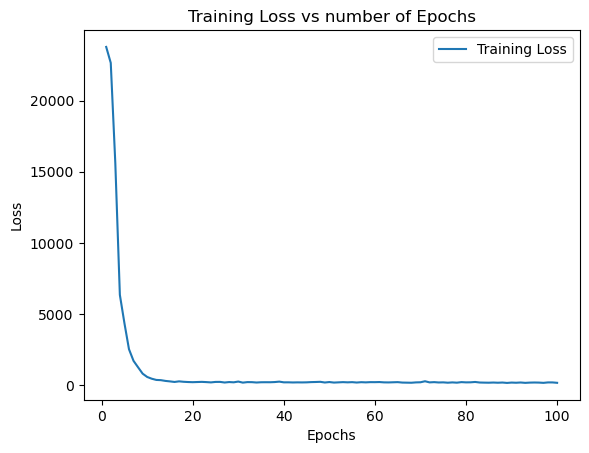

In [49]:
# Plotting the training loss against the number of epochs

# Extract training loss values
training_loss = history.history['loss']

# Create a range of epochs
epochs = range(1, len(training_loss) + 1)

# Plot training loss
plt.plot(epochs, training_loss, label='Training Loss')
plt.title('Training Loss vs number of Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [80]:
# True values vs Predicted values Trend
# Date column should be indexed otherwise modify to suit your setup

def plot_true_vs_predicted(true_values, predicted_values, dates, title='True vs Predicted'):
    """
    Plot true values against predicted values and calculate RMSE and MAPE.

    Args:
        true_values (array-like): True values.
        predicted_values (array-like): Predicted values.
        dates (array-like): Dates corresponding to the values.
        title (str): Title of the plot (default: 'True vs Predicted').

    Returns:
        float: Root Mean Squared Error (RMSE).
        float: Mean Absolute Percentage Error (MAPE).
    """
    # Convert dates to datetime objects
    x_dates = [dt.datetime.strptime(d, '%Y-%m-%d').date() for d in dates]
    x_dates_trimmed = x_dates[:len(true_values)]

    # Average predicted values if multiple timestamps
    if len(predicted_values.shape) > 1:
        predicted_values = np.mean(predicted_values[:len(x_dates_trimmed)], axis=1)

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(true_values, predicted_values))
    
    # Calculate MAPE
    mape = np.mean(np.abs((true_values - predicted_values) / true_values)) * 100

    # Plot true values and predicted values
    plt.figure(figsize=(15, 10))
    plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
    plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=60))
    plt.plot(x_dates_trimmed, true_values, label='True values')
    plt.plot(x_dates_trimmed, predicted_values, label='Predicted values')
    plt.xlabel('Time Scale')
    plt.ylabel('Scaled USD')
    plt.legend()
    plt.title(title)
    plt.gcf().autofmt_xdate()
    plt.show()

    return rmse, mape

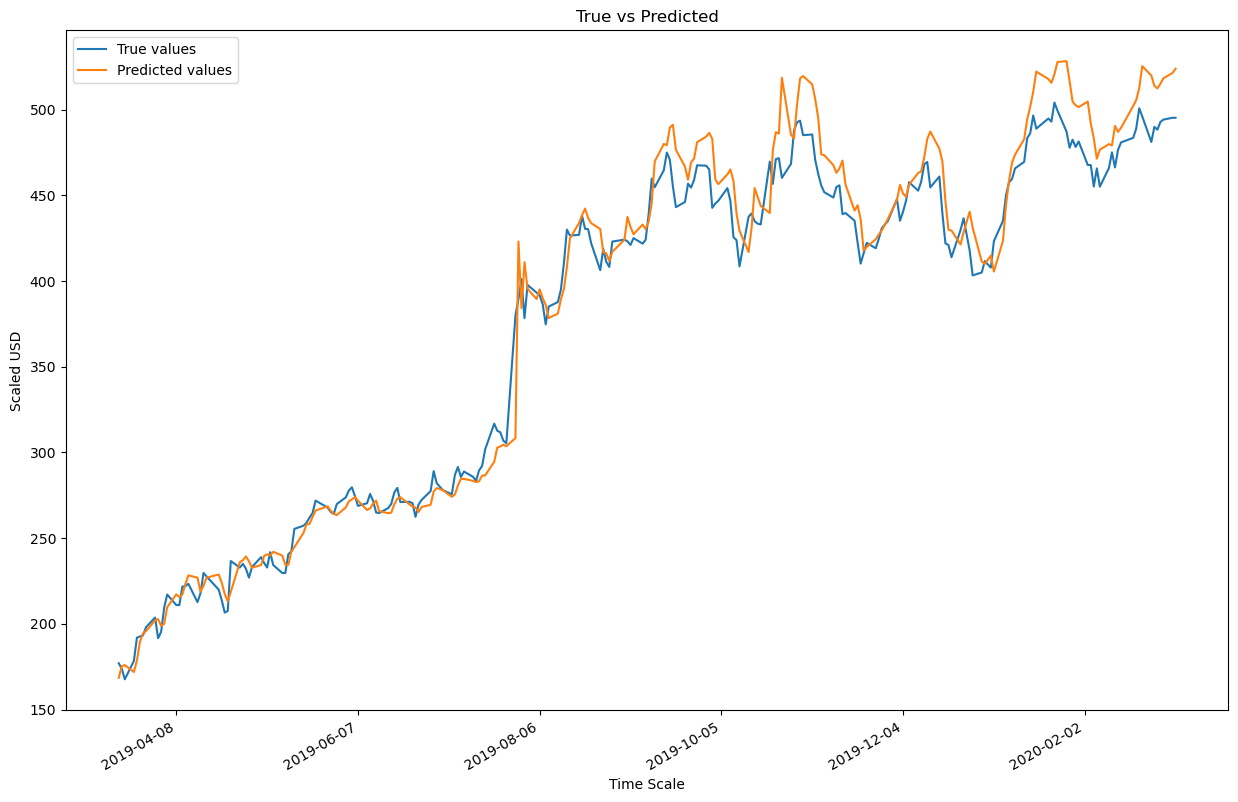

(16.445831453107303, 3.1087777428185035)

In [81]:
# True values against LSTM values
plot_true_vs_predicted(y_test_seq, y_pred, NVIDIA_data.index.values)

In [84]:
print("RMSE: ", rmse)
print("MAE: ", mape)

RMSE:  16.445831453107303
MAE:  0.031087777428185033
